CS334 Final Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import matplotlib.pyplot as plt

In [ ]:
#iris-mac version
df = pd.read_csv("/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
print(df.head())
print(df.shape)

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0   

In [ ]:
#Windows version
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
print(df.head())
print(df.shape)

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0   

###EDA and Preprocessing

In [ ]:
#don't need to run this
# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Summary statistics:
       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
2

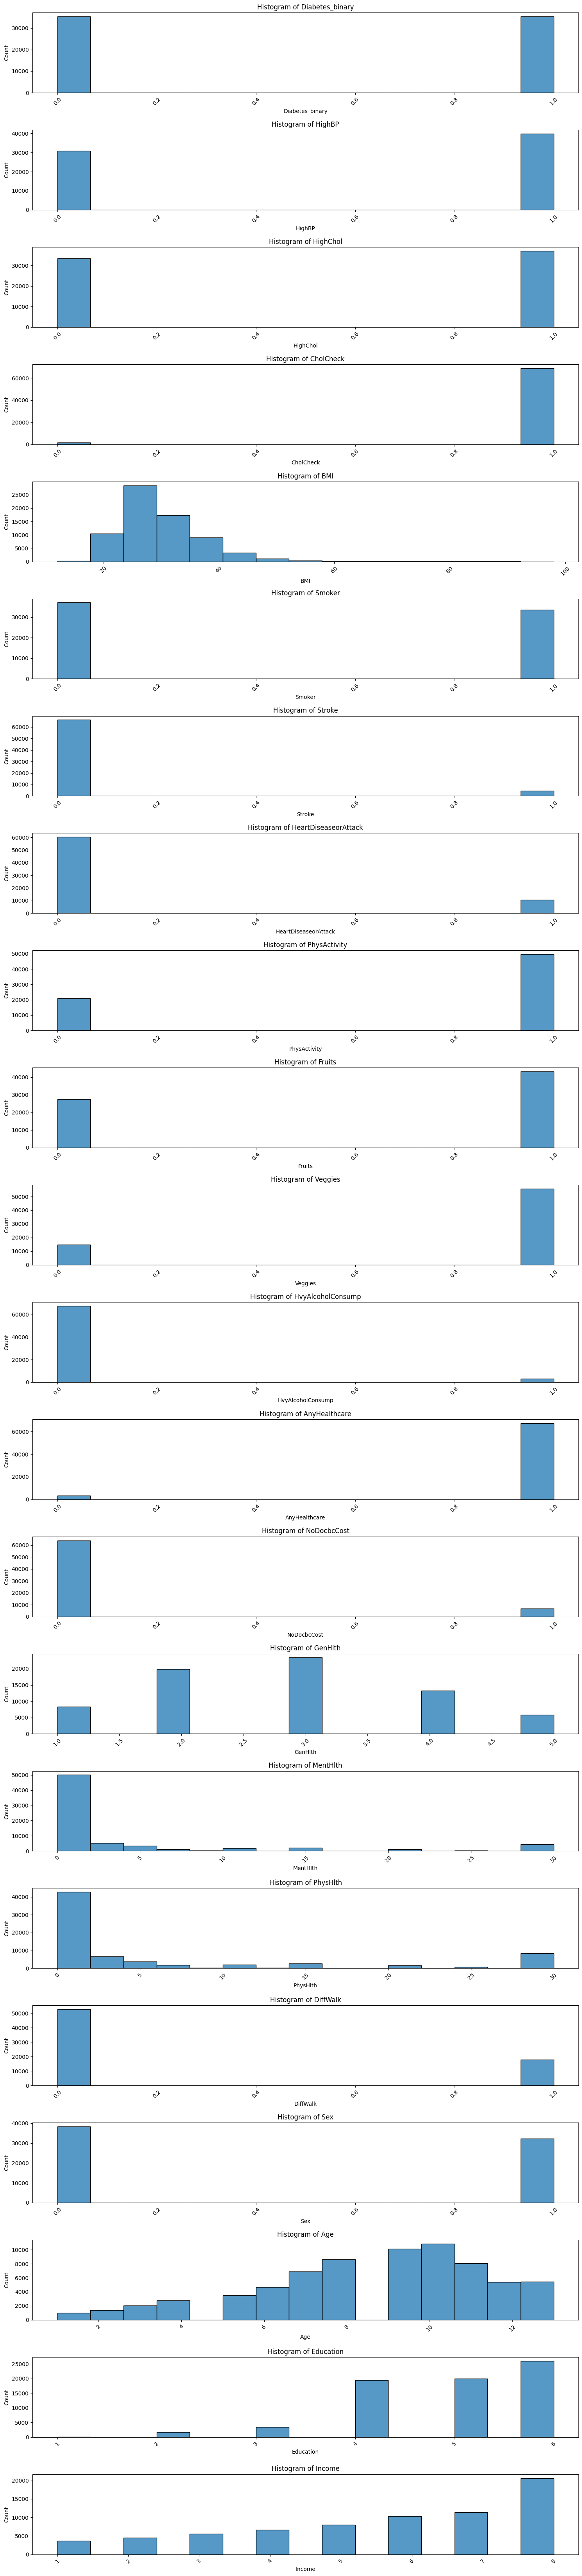

In [ ]:
#don't need to run this
# Plotting histograms for all numeric features to understand distributions
# Assuming df is your DataFrame
num_columns = df.select_dtypes(include='number').columns
num_of_columns = len(num_columns)

# Set a larger figure size for readability
plt.figure(figsize=(15, 3 * num_of_columns))

# Plotting histograms with more space and proper labeling
for i, col in enumerate(num_columns):
    plt.subplot(num_of_columns, 1, i + 1)
    sns.histplot(df[col], kde=False, bins=15)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate the x-axis labels if they are overlapping

plt.tight_layout()
plt.show()

In [ ]:
#split x and y
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

In [ ]:
#Create Test/Train split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#scale data
scaler = StandardScaler()
scaler.fit(xTrain)
xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)

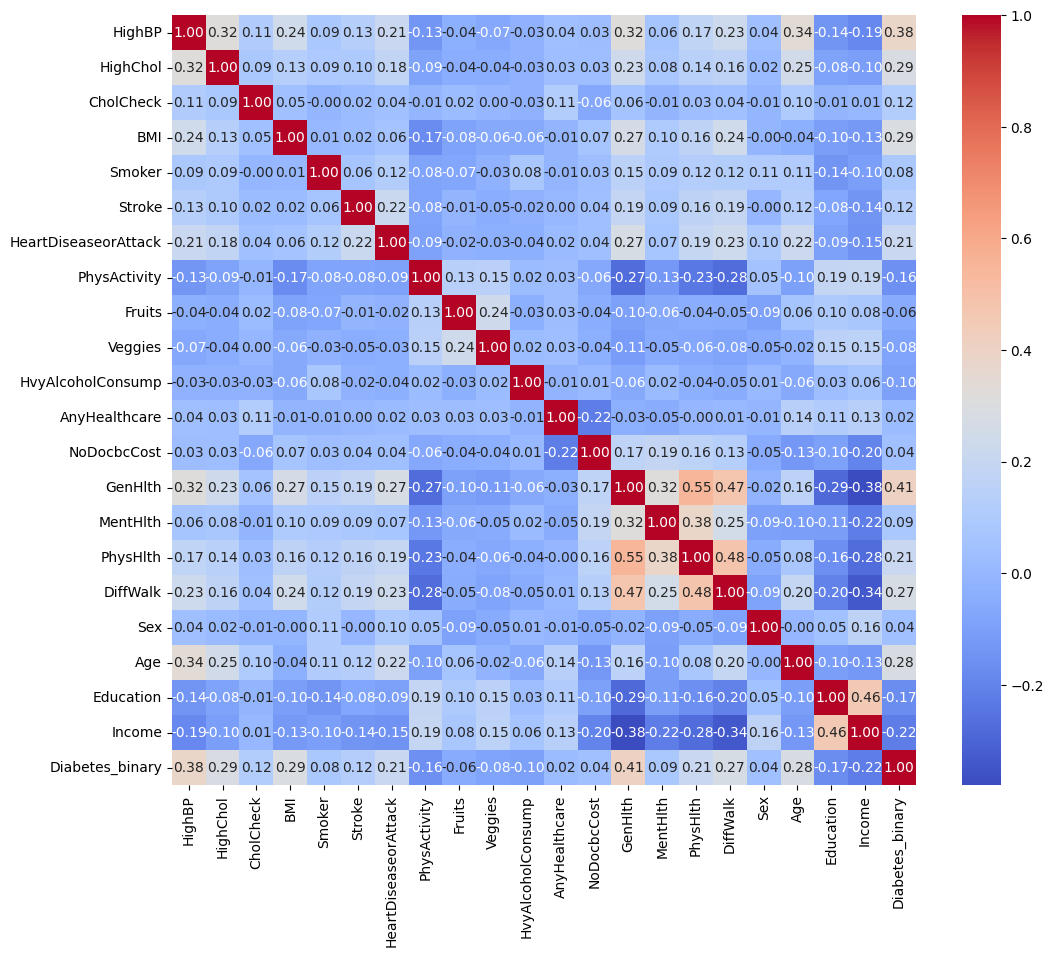

In [ ]:
#draw heatmap
x_train_4_hm = pd.DataFrame(xTrain, columns=X.columns)
x_train_4_hm['Diabetes_binary'] = yTrain.values
x_train_4_hm = x_train_4_hm.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(x_train_4_hm, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [ ]:
corr_matrix = x_train_4_hm.abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Drop high features
to_drop = []
#convert xTrain and xTest to dataframes to drop columns
xTrain = pd.DataFrame(xTrain, columns=X.columns)
xTest = pd.DataFrame(xTest, columns=X.columns)
for col in upper.columns:
  if any(upper[col] > 0.8):
    correlated_pairs = upper.index[upper[col] > 0.8].tolist()
    drop = col if corr_matrix.loc[col, xTrain.columns[-1]] < max(corr_matrix.loc[correlated_pairs, xTrain.columns[-1]]) else correlated_pairs
    to_drop.extend(drop if isinstance(drop, list) else [drop])

xTrain.drop(columns=set(to_drop), inplace=True)
xTest.drop(columns=set(to_drop), inplace=True)

#Drop low features
target = x_train_4_hm.columns[-1]
low_corr_features = corr_matrix.index[corr_matrix[target] < 0.05].tolist()
if target in low_corr_features:
  low_corr_features.remove(target)
xTrain.drop(columns=low_corr_features, inplace=True)
xTest.drop(columns=low_corr_features, inplace=True)

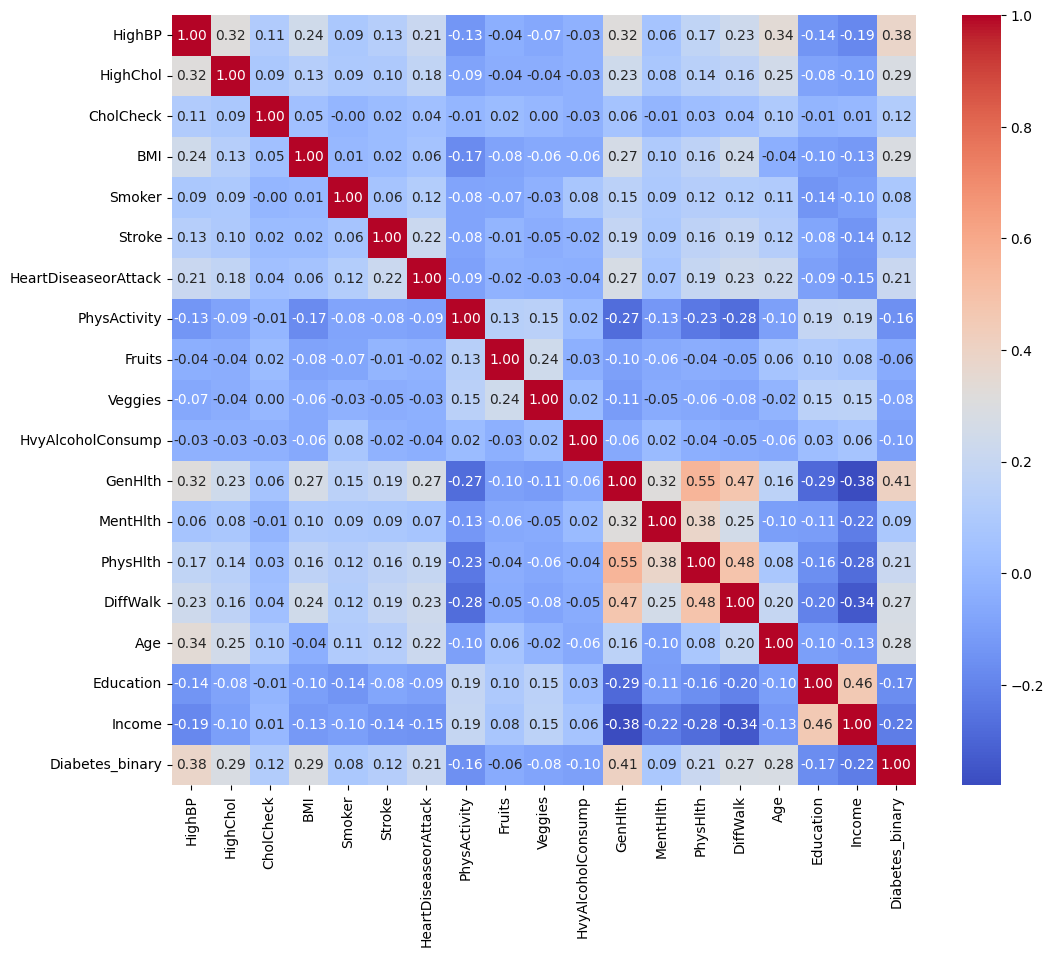

     HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  \
0  0.880716 -1.050781   0.160486 -0.687371 -0.951909 -0.256732   
1  0.880716  0.951673   0.160486 -0.405776  1.050520 -0.256732   
2  0.880716 -1.050781   0.160486 -0.405776  1.050520 -0.256732   
3 -1.135440  0.951673   0.160486 -0.687371 -0.951909 -0.256732   
4  0.880716  0.951673   0.160486 -0.546574  1.050520 -0.256732   

   HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  HvyAlcoholConsump  \
0             -0.414917      0.647525 -1.260864  0.516538          -0.213299   
1              2.410123     -1.544341 -1.260864 -1.935966          -0.213299   
2             -0.414917      0.647525 -1.260864 -1.935966          -0.213299   
3             -0.414917      0.647525 -1.260864 -1.935966          -0.213299   
4             -0.414917      0.647525 -1.260864 -1.935966           4.688249   

    GenHlth  MentHlth  PhysHlth  DiffWalk       Age  Education    Income  \
0  1.048676 -0.459261 -0.276717 -0.579031  0.8

In [ ]:
#plot the modified dataset
x_train_4_hm = xTrain
x_train_4_hm['Diabetes_binary'] = yTrain.values
x_train_4_hm = x_train_4_hm.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(x_train_4_hm, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
#View the modified dataset
print(xTrain.head())
print(xTrain.shape)


In [ ]:
#drop y in xTrain, added before for heatmap drawing purpose
xTrain = xTrain.drop('Diabetes_binary', axis=1)

In [ ]:
xTrain = xTrain.to_numpy()
xTest = xTest.to_numpy()

Now we have: xTrain, xTest, yTrain, yTest. xTrain and xTest are scaled and elements that are highly correlated are dropped as well as columns that has too small correlaion with y (Diabetes_binary). yTrain and yTest are numpy array.

##Model Implementation and hyperparameter tunning


**Hyperparameter Tuning**

In [ ]:
def eval_randomsearch(clf, pgrid, xTrain, yTrain, xTest, yTest):
    """
    Given a sklearn classifier and a parameter grid to search,
    choose the optimal parameters from pgrid using Random Search CV
    and train the model using the training dataset and evaluate the
    performance on the test dataset. The random search cv should try
    at most 33% of the possible combinations.
    """

    n_iter = max(1, int(len(pgrid)*0.33))
    random_search = RandomizedSearchCV(clf, pgrid, cv=5, n_iter=n_iter)
    random_search.fit(xTrain, yTrain)
    best_params = random_search.best_params_
    clf.set_params(**best_params)
    clf.fit(xTrain, yTrain)

    yPred = clf.predict(xTest)
    yPredProb = clf.predict_proba(xTest)[:, 1]

    auc = roc_auc_score(yTest, yPredProb)
    auprc = average_precision_score(yTest, yPredProb)
    f1 = f1_score(yTest, yPred)


    result_dict = {
        "AUC": auc,
        "AUPRC": auprc,
        "F1": f1
    }

    fpr, tpr, _ = roc_curve(yTest, yPredProb)
    roc_dict = {
        "fpr": fpr,
        "tpr": tpr
    }

    return result_dict, roc_dict, best_params

In [ ]:
def eval_randomsearch(clf, pgrid, xTrain, yTrain, xTest, yTest):
    """
    Random Search CV for hyperparameter tuning.
    """
    total_combinations = np.prod([len(v) for v in pgrid.values()])
    n_iter = max(10, int(total_combinations * 0.33))
    random_search = RandomizedSearchCV(clf, param_distributions=pgrid, n_iter=n_iter, scoring='roc_auc', cv=5)
    random_search.fit(xTrain, yTrain)
    best_clf = random_search.best_estimator_
    y_pred = best_clf.predict(xTest)
    y_scores = best_clf.predict_proba(xTest)[:, 1]
    best_params = random_search.best_params_
    results = {"AUC": metrics.roc_auc_score(yTest, y_scores),
               "AUPRC": metrics.average_precision_score(yTest, y_scores),
               "F1": metrics.f1_score(yTest, y_pred)}
    fpr, tpr, _ = roc_curve(yTest, y_scores)
    roc = {"fpr": fpr, "tpr": tpr}
    return results, roc, best_params

In [ ]:
def get_parameter_grid(mName):
    """
    Get the parameter grid based on the model name with an expanded range of hyperparameters.
    """
    #some changes made by summer
    grids = {
        #KNN
        "DT": {
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 10, 20, 40],
            'min_samples_leaf': [1, 2, 4, 6],
            'criterion': ['gini', 'entropy']
        },
        "LR": {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['newton-cg', 'lbfgs', 'saga'], #removed liblinear because doesn't support penalty = 'none'
            'penalty': [None, 'l1', 'l2', 'elasticnet'], #change 'none' to None
            'class_weight': [None, 'balanced']
        },
        "RF": {
            'n_estimators': [10, 50, 100, 200, 300],
            'max_features': ['sqrt', 'log2'],#removed auto so won't be max_features = auto warnings
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        },
        "NB": {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
        },
        "NN": {
            'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
            'activation': ['relu', 'tanh', 'logistic'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'invscaling', 'adaptive']
        }
    }
    return grids.get(mName, {})

In [ ]:

models = {
    "DT": DecisionTreeClassifier(),
    "LR": LogisticRegression(),
    # "RF": RandomForestClassifier(),
    "NB": GaussianNB(),
    # "NN": MLPClassifier(max_iter=1000)
}

In [ ]:
def evaluate_model(model, xTest, yTest):
    y_pred = model.predict(xTest)
    y_scores = model.predict_proba(xTest)[:, 1]

    accuracy = accuracy_score(yTest, y_pred)
    precision = precision_score(yTest, y_pred)
    recall = recall_score(yTest, y_pred)
    f1 = f1_score(yTest, y_pred)
    roc_auc = roc_auc_score(yTest, y_scores)

    # Calibration curve
    prob_true, prob_pred = calibration_curve(yTest, y_scores, n_bins=10)

    plt.figure(figsize=(6, 6))
    plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
    plt.xlabel('Mean predicted probability')
    plt.ylabel('True probability in each bin')
    plt.legend()
    plt.title('Calibration Curve')
    plt.show()

    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}, confusion_matrix(yTest, y_pred)


Tuning DT...
Tuning LR...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

Tuning NB...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


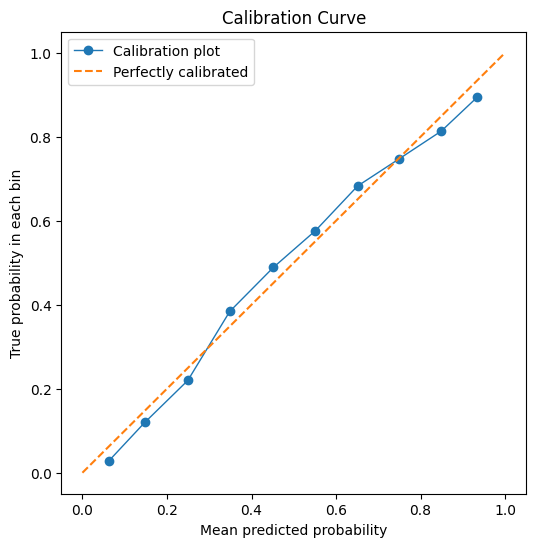

Performance Metrics: {'Accuracy': 0.746941084942358, 'Precision': 0.7366053169734151, 'Recall': 0.7664917009504895, 'F1 Score': 0.7512513904338154, 'ROC AUC': 0.8238585092744902}
Confusion Matrix:
 [[5158 1932]
 [1646 5403]]


In [ ]:
models = {
    "DT": DecisionTreeClassifier(),
    "LR": LogisticRegression(),
    # "RF": RandomForestClassifier(),
    "NB": GaussianNB()
    # "NN": MLPClassifier(max_iter=1000)
}

bestAUC = 0
bestModel = None

for mName, clf in models.items():
  print(f"Tuning {mName}...")
  grid = get_parameter_grid(mName)
  results, roc, best_params = eval_randomsearch(clf, grid, xTrain, yTrain, xTest, yTest)
  if results['AUC'] > bestAUC:
      bestAUC = results['AUC']
      bestModel = clf.set_params(**best_params)
      bestModel.fit(xTrain, yTrain)

metrics, conf_matrix = evaluate_model(bestModel, xTest, yTest)
print("Performance Metrics:", metrics)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
# debugging version

def eval_randomsearch(clf, pgrid, xTrain, yTrain, xTest, yTest):
    """
    Random Search CV for hyperparameter tuning.
    """
    start = time.time()
    total_combinations = np.prod([len(v) for v in pgrid.values()])
    n_iter = max(10, int(total_combinations * 0.33))
    random_search = RandomizedSearchCV(clf, param_distributions=pgrid, n_iter=n_iter, scoring='roc_auc', cv=5)
    random_search.fit(xTrain, yTrain)
    best_clf = random_search.best_estimator_
    y_pred = best_clf.predict(xTest)
    y_scores = best_clf.predict_proba(xTest)[:, 1]
    best_params = random_search.best_params_
    elapsed_time = time.time() - start
    results = {"AUC": metrics.roc_auc_score(yTest, y_scores),
               "AUPRC": metrics.average_precision_score(yTest, y_scores),
               "F1": metrics.f1_score(yTest, y_pred),
               "Time": elapsed_time}
    fpr, tpr, _ = roc_curve(yTest, y_scores)
    roc = {"fpr": fpr, "tpr": tpr}
    return results, roc, best_params

def get_parameter_grid(mName):
    """
    Get the parameter grid based on the model name with an expanded range of hyperparameters.
    """
    grids = {
        "DT": {
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 10, 20, 40],
            'min_samples_leaf': [1, 2, 4, 6],
            'criterion': ['gini', 'entropy']
        },
        "LR": {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
            'penalty': ['none', 'l1', 'l2', 'elasticnet'],
            'class_weight': [None, 'balanced']
        },
        "NB": {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
        }
    }
    return grids.get(mName, {})


models = {
    "DT": DecisionTreeClassifier(),
    "LR": LogisticRegression(),
    "NB": GaussianNB(),
}



def evaluate_model(model, xTest, yTest):
    y_pred = model.predict(xTest)
    y_scores = model.predict_proba(xTest)[:, 1]

    accuracy = accuracy_score(yTest, y_pred)
    precision = precision_score(yTest, y_pred)
    recall = recall_score(yTest, y_pred)
    f1 = f1_score(yTest, y_pred)
    roc_auc = roc_auc_score(yTest, y_scores)

    # Calibration curve
    prob_true, prob_pred = calibration_curve(yTest, y_scores, n_bins=10)

    plt.figure(figsize=(6, 6))
    plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
    plt.xlabel('Mean predicted probability')
    plt.ylabel('True probability in each bin')
    plt.legend()
    plt.title('Calibration Curve')
    plt.show()

    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}, confusion_matrix(yTest, y_pred)

models = {
    "DT": DecisionTreeClassifier(),
    "LR": LogisticRegression(),
    "NB": GaussianNB(),
}

bestAUC = 0
bestModel = None
best_params_all_models = {}
model_predictions = {}
evaluation_scores = {}
roc_data = {}
prc_data = {}

for mName, clf in models.items():
    print(f"Tuning {mName}...")
    grid = get_parameter_grid(mName)
    results, roc, best_params = eval_randomsearch(clf, grid, xTrain, yTrain, xTest, yTest)
    best_params_all_models[mName] = best_params

    best_clf = clf.set_params(**best_params)
    best_clf.fit(xTrain, yTrain)
    model_predictions[mName] = best_clf.predict_proba(xTest)[:, 1]

    metrics, conf_matrix = evaluate_model(best_clf, xTest, yTest)
    evaluation_scores[mName] = metrics
    roc_data[mName] = {'fpr': roc['fpr'], 'tpr': roc['tpr']}

    # Calculate precision and recall for PRC
    precision, recall, _ = precision_recall_curve(yTest, model_predictions[mName])
    prc_data[mName] = {'precision': precision, 'recall': recall}

    # If needed, select the best model based on AUC (keep this if you want to track the best model)
    if metrics['ROC AUC'] > bestAUC:
        bestAUC = metrics['ROC AUC']
        bestModel = best_clf

plt.figure(figsize=(12, 6))
for mName, roc in roc_data.items():
    plt.plot(roc['fpr'], roc['tpr'], label=f'{mName} (AUC = {evaluation_scores[mName]["ROC AUC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves Across Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(12, 6))
for mName, prc in prc_data.items():
    plt.plot(prc['recall'], prc['precision'], label=f'{mName}')
plt.title('Precision-Recall Curves Across Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()


In [ ]:
"""
import numpy as np
from sklearn.ensemble import RandomForestClassifier

def calculate_oob_permutation_importance(X_train, y_train, n_estimators=100):
    # Initialize the Random Forest model with OOB scoring
    model = RandomForestClassifier(oob_score=True, n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)

    features_importance = np.zeros((X_train.shape[1], n_estimators))

    # For each tree in the forest...
    for tree_idx, tree in enumerate(model.estimators_):
        # Get the OOB samples for this tree
        unsampled_indices = _get_oob_samples(tree)
        oob_samples = X_train.values[unsampled_indices]
        oob_target = y_train.values[unsampled_indices]

        # Record the baseline OOB accuracy
        baseline_accuracy = tree.score(oob_samples, oob_target)

        # For each feature...
        for feature_idx in range(X_train.shape[1]):
            # Copy the OOB samples and permute this feature
            permuted_oob_samples = oob_samples.copy()
            np.random.shuffle(permuted_oob_samples[:, feature_idx])

            # Calculate the accuracy with the permuted data
            permuted_accuracy = tree.score(permuted_oob_samples, oob_target)

            # Record the change in accuracy
            features_importance[feature_idx, tree_idx] = baseline_accuracy - permuted_accuracy

    # Compute the average and standard deviation of the importances for each feature
    importances_mean = features_importance.mean(axis=1)
    importances_std = features_importance.std(axis=1)

    # Return the importances along with their means and standard deviations
    return importances_mean, importances_std

def _get_oob_samples(tree):
    # Placeholder function to obtain the OOB sample indices for a given tree
    # Actual implementation will vary and requires access to internal indices from the fitted model
    pass

# Example of how you would call this function
importances_mean, importances_std = calculate_oob_permutation_importance(X_train, y_train, n_estimators=100)

# You would then use `importances_mean` and `importances_std` to plot your graph of feature importances

"""